In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.patches as mpatches

In [2]:
# no sign for lat because of 'N'
# '-' sign for lon because of 'W'
def dms2dd(as_string):
    degrees = int(as_string[:2])
    minutes = int(as_string[2:4])
    seconds = float(as_string[4:8])
    lat_dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    degrees = -1*int(as_string[10:13])
    minutes = -1*int(as_string[13:15])
    seconds = -1*float(as_string[15:19])
    lon_dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);

    return lat_dd, lon_dd;

In [3]:
def get_color(cluster):
    if cluster == 1:
        return 'lime'
    if cluster == 2:
        return 'brown'
    if cluster == 3:
        return 'orange'
    if cluster == 4:
        return 'green'
    if cluster == 5:
        return 'cyan'
    if cluster == 6:
        return 'darkviolet'
    if cluster == 7:
        return 'magenta'
    if cluster == 8:
        return 'pink'
    if cluster == 9:
        return 'darkblue'
    if cluster == 10:
        return 'blue'
        #return 'lime'
        #return 'darkcyan'

In [101]:
TMA_lon=[-5.5000, -5.5000, -5.5000, -5.5000, -5.5000, -6.6169, -6.8333, -7.3333, -7.3333, -6.7606, -5.5000];

TMA_lat=[53.9167, 53.7672, 53.0975, 52.7594, 52.3333, 52.6139, 52.7594, 53.0908, 53.7522, 54.1619, 53.9167];

def plot_TMA_EIDW(ax):
      
    # Runway 10R
    rwy10R_lon=[-6.290075, -6.250578];
    rwy10R_lat=[53.42243, 53.42026];

    # Runway 28L
    rwy28L_lon=[-6.250578, -6.290075];
    rwy28L_lat=[53.42026, 53.42243];

    # Runway 16
    rwy16_lon=[-6.261978, -6.249594];
    rwy16_lat=[53.43699, 53.41991];

    # Runway 34
    rwy34_lon=[6.249594, -6.261978];
    rwy34_lat=[53.41991, 53.43699];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy10R_lon, rwy10R_lat, color="red")
    plt.plot(rwy16_lon, rwy16_lat, color="red")
    
    # Entry Points
    ABLIN_lon = -4.9925
    ABLIN_lat =	52.7828
    BAGSO_lon = -5.5000
    BAGSO_lat =	53.6800
    BAMLI_lon = -6.6511
    BAMLI_lat =	54.1412
    BOYNE_lon = -5.5000
    BOYNE_lat =	53.7671
    BUNED_lon = -6.6301
    BUNED_lat =	52.6228
    LIPGO_lon = -5.5000
    LIPGO_lat =	53.0639
    NIMAT_lon = -5.7421
    NIMAT_lat =	53.9650
    OLAPO_lon = -7.2946
    OLAPO_lat =	53.7803
    OSGAR_lon = -7.2702
    OSGAR_lat =	53.0494
    SUTEX_lon = -6.9304
    SUTEX_lat =	52.8244
    VATRY_lon = -5.5000
    VATRY_lat =	52.5544
    '''
    plt.plot(ABLIN_lon, ABLIN_lat, 'ro')
    plt.plot(BAGSO_lon, BAGSO_lat, 'ro')
    plt.plot(BAMLI_lon, BAMLI_lat, 'ro')
    plt.plot(BOYNE_lon, BOYNE_lat, 'ro')
    plt.plot(BUNED_lon, BUNED_lat, 'ro')
    plt.plot(LIPGO_lon, LIPGO_lat, 'ro')
    plt.plot(NIMAT_lon, NIMAT_lat, 'ro')
    plt.plot(OLAPO_lon, OLAPO_lat, 'ro')
    plt.plot(OSGAR_lon, OSGAR_lat, 'ro')
    plt.plot(SUTEX_lon, SUTEX_lat, 'ro')
    plt.plot(VATRY_lon, VATRY_lat, 'ro')
    '''
    SIVNA_lat, SIVNA_lon = dms2dd("531152.3N 0053827.7W")
    KOGAX_lat, KOGAX_lon = dms2dd("533418.6N 0053814.1E")
    
    #plt.plot(SIVNA_lon, SIVNA_lat, 'ro')
    #plt.plot(KOGAX_lon, KOGAX_lat, 'ro')
    
    SIVNA_square_lon = [SIVNA_lon - 0.05, SIVNA_lon - 0.05, SIVNA_lon + 0.05, SIVNA_lon + 0.05, SIVNA_lon - 0.05]
    SIVNA_square_lat = [SIVNA_lat - 0.05, SIVNA_lat + 0.05, SIVNA_lat + 0.05, SIVNA_lat - 0.05, SIVNA_lat - 0.05]

    #KOGAX_square_lon = [KOGAX_lon - 0.05, KOGAX_lon - 0.05, KOGAX_lon + 0.05, KOGAX_lon + 0.05, KOGAX_lon - 0.05]
    #KOGAX_square_lat = [KOGAX_lat - 0.05, KOGAX_lat + 0.05, KOGAX_lat + 0.05, KOGAX_lat - 0.05, KOGAX_lat - 0.05]
    KOGAX_square_lon = [KOGAX_lon - 0.04, KOGAX_lon - 0.04, KOGAX_lon + 0.04, KOGAX_lon + 0.04, KOGAX_lon - 0.04]
    KOGAX_square_lat = [KOGAX_lat - 0.03, KOGAX_lat + 0.03, KOGAX_lat + 0.03, KOGAX_lat - 0.03, KOGAX_lat - 0.03]
        
    #plt.plot(SIVNA_square_lon, SIVNA_square_lat, color="red")
    #plt.plot(KOGAX_square_lon, KOGAX_square_lat, color="red")
    
    rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
    rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];
    
    #plt.plot(rwy28L_around_lon, rwy28L_around_lat)
    
    rwy28L_left_lon=[-6.29,   -6.29,   -6.4 ,  -6.4, -6.29];
    rwy28L_left_lat=[53.27, 53.57, 53.57, 53.27, 53.27];
    
    #plt.plot(rwy28L_left_lon, rwy28L_left_lat)
    
    rwy28L_down_lon=[-6.29,   -6.29,   -6.19 ,  -6.19, -6.29];
    rwy28L_down_lat=[53.32, 53.37, 53.37, 53.32, 53.32];

    #plt.plot(rwy28L_down_lon, rwy28L_down_lat)
    
    rwy28L_up_lon=[-6.19,   -6.19,   -6.09 ,  -6.09, -6.19];
    rwy28L_up_lat=[53.50, 53.55, 53.55, 53.50, 53.50];

    #plt.plot(rwy28L_up_lon, rwy28L_up_lat)
    
    left_circle_center_lon = -6.35
    left_circle_center_lat =53.42
    left_circle2_center_lon = -6.3
    left_circle2_center_lat =53.45
    down_circle_center_lon = -6.23
    down_circle_center_lat = 53.35
    up_circle_center_lon = -6.14
    up_circle_center_lat = 53.46
    up_circle2_center_lon = -6.1
    up_circle2_center_lat = 53.46
    
    circle = plt.Circle((left_circle_center_lon, left_circle_center_lat), 0.052, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((down_circle_center_lon, down_circle_center_lat), 0.029, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((up_circle_center_lon, up_circle_center_lat), 0.028, fill=False, color="red")
    #ax.add_patch(circle)
    
    circle = plt.Circle((left_circle2_center_lon, left_circle2_center_lat), 0.029, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((up_circle2_center_lon, up_circle2_center_lat), 0.023, fill=False, color="red")
    #ax.add_patch(circle)
    
    center_lon = -6.3
    center_lat = 53.3
    circle = plt.Circle((center_lon, center_lat), 0.67, fill=False, color="red")
    #circle = plt.Circle((center_lon, center_lat), 0.75, fill=False, color="red")
    #circle = plt.Circle((center_lon, center_lat), 0.83, fill=False, color="red")
    #ax.add_patch(circle)

In [89]:
from matplotlib import patches
def circle(fig, ax, xy, radius):

    # Get the transScale (important if one of the axis is in log-scale)
    trans_data = ax.transScale + (ax.transLimits + ax.transAxes)
    central_trans_data = trans_data.transform_point(xy)
    central_fig = fig.transFigure.inverted().transform(central_trans_data)

    # Create circle
    circ = patches.Ellipse(central_fig, radius, radius, transform=fig.transFigure, **{'color': 'red', 'fill': False, 'clip_on': False})

    # Draw circle
    ax.add_artist(circ)

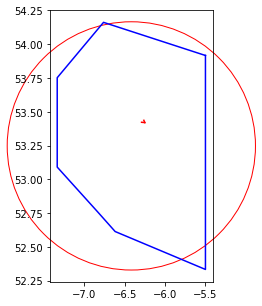

In [102]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))

central_lat = 53.42
central_lon = -6.27
central_lat = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
central_lon = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2

# calculate the aspect ratio that will approximate a 
# Mercator projection at this central latitude 
mercator_aspect_ratio = 1/cos(radians(central_lat))

# set the aspect ratio of the axes to that
ax.set_aspect(mercator_aspect_ratio)

plot_TMA_EIDW(ax)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.xlim(xlim)
plt.ylim(ylim)

radius_degree = 0.83 # 1 degreee = 60 NM => 50 NM = 5/6 degree = 0.83
radius_percent = radius_degree/(ylim[1] - ylim[0])
radius = radius_percent * mercator_aspect_ratio

circle(fig, ax, (central_lon, central_lat), radius)

In [98]:
 def plot_horizontal_profile_EIDW(df, runway, linewidth, title = ""):
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    plt.title(title)
    
    central_lat = 53.42
    central_lon = -6.27
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_lat))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)
  
    # plot trajectories
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_EIDW(ax)
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        #plt.plot(lon, lat, color='k', linewidth=linewidth)
        plt.plot(lon, lat, linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)
        
    # plot 50 NM circle
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.xlim(xlim)
    plt.ylim(ylim)

    radius_degree = 0.83 # 1 degreee = 60 NM => 50 NM = 5/6 degree = 0.83
    radius_percent = radius_degree/(ylim[1] - ylim[0])
    radius = radius_percent * mercator_aspect_ratio
    print(radius)

    circle(fig, ax, (central_lon, central_lat), radius)

# Data uploading

In [8]:
filename = "../data/EIDW_50NM/2019/Dataset/EIDW_dataset_TT_50NM_first.csv"
dataset_TT_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
dataset_TT_df.set_index(['flight_id', 'sequence'], inplace = True)

NameError: name 'disp' is not defined

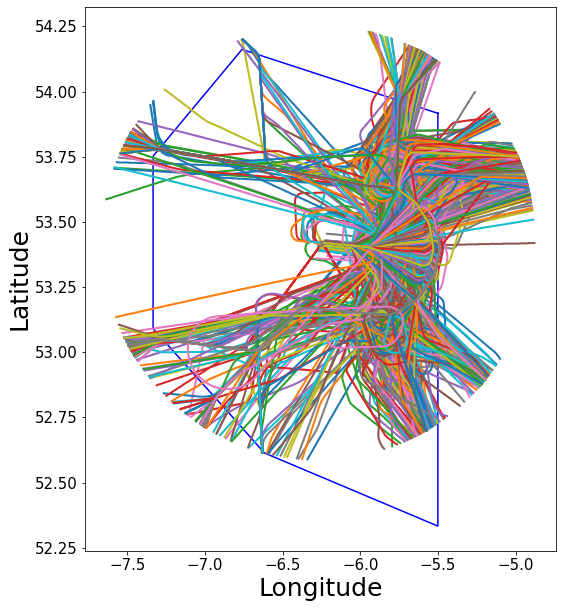

In [100]:
plot_horizontal_profile_EIDW(dataset_TT_df, 'x', 2)

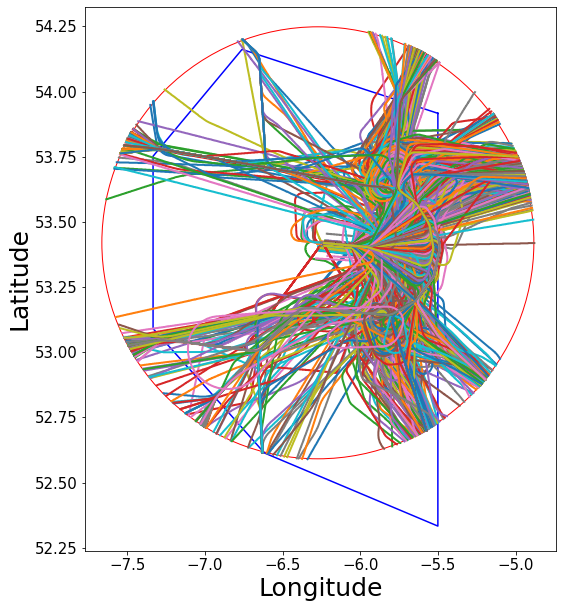

In [9]:
plot_horizontal_profile_EIDW(dataset_TT_df, 'x', 2)